One of the most informative ways to consider daily returns is to compare one stock with another  
+ histogtam: a bar chart that we plot the number of occurrences of each item verces the value.  

It's not unusual that a histogram of daily returns ends up looking like a bell cure.
Several characteristics:  
+ Mean  
+ Standard Devidation  
+ Kurtosis: tells us about the tails of the distribution.  
**Positive** number/fat tails: there are more occurances out in these tails   than you expected it were a normal distribution.  
**Negative** number/skinny tails

In [3]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
########################################################################
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)# 1create empty df for designated date
    
    if 'SPY' not in symbols:  # 2add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol, base_dir="data"), # 3read in data from the symbol
                           index_col='Date',
                           parse_dates=True,
                           usecols=['Date','Adj Close'],
                           na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})       # 4rename the adjust close column to the symbol name
        df=df.join(df_temp) 
        if symbol =='SPY':#5drop rows where SPY is na/ensure SPY is used as a reference-we don't have na values in the spy column
            df=df.dropna(subset=['SPY'])
    return df
########################################################################
def normalize_data(df):
    return df/df.ix[0,:]
########################################################################
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    plot_data(df.ix[start_index:end_index,columns],title='Selected data')

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
########################################################################
def get_bollinger_bands(rm,rstd):
    upper_band=rm+2*rstd
    lower_band=rm-2*rstd
    return upper_band,lower_band

def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling( window=window,center=False).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window=window,center=False).std()
########################################################################
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns=df.copy()
    daily_returns[1:]=(df[1:]/df[:-1].values)-1
    daily_returns.iloc[0,:]=0
    return daily_returns
########################################################################
def fill_missing_values(df_data):
    df_data.fillna(method='ffill',inplace=True)#fill forward
    df_data.fillna(method='bfill',inplace=True)#fill backward

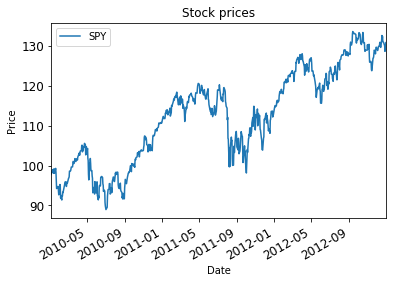

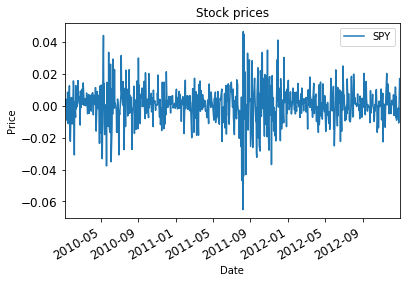

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

dates=pd.date_range('2009-01-01','2012-12-31')
symbols=['SPY']
df=get_data(symbols,dates)
plot_data(df)

daily_returns=compute_daily_returns(df)
plot_data(daily_returns)

###  Computing histogram statistics

mean= 0.000452278241658
std= 0.0115572463305
kurtosis:
SPY    3.434399
dtype: float64


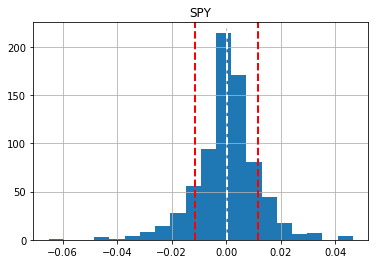

In [5]:
mean=daily_returns['SPY'].mean()
print 'mean=',mean
std=daily_returns['SPY'].std()
print 'std=',std
print 'kurtosis:\n',daily_returns.kurtosis() #fat tails

daily_returns.hist(bins=20)
plt.axvline(mean,color='w',linestyle='dashed',linewidth=2)
plt.axvline(std,color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='r',linestyle='dashed',linewidth=2)
plt.show()

### Compare two histograms
+ These are histograms of daily return values, i.e. X-axis is +/- change (%), and Y-axis is the number of occurrences.
+ We are considering two general properties indicated by the histogram for each stock: **return and volatility (or risk)**.

### Plot two histograms together

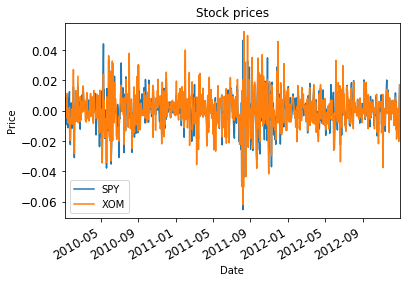

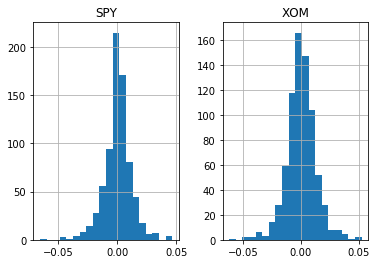

In [6]:
dates=pd.date_range('2009-01-01','2012-12-31')
symbols=['SPY','XOM']
df=get_data(symbols,dates)
#plot_data(df)

daily_returns=compute_daily_returns(df)
plot_data(daily_returns)
daily_returns.hist(bins=20)
plt.show()

mean= 0.000452278241658
std= 0.0115572463305
kurtosis:
SPY    3.434399
XOM    2.564002
dtype: float64


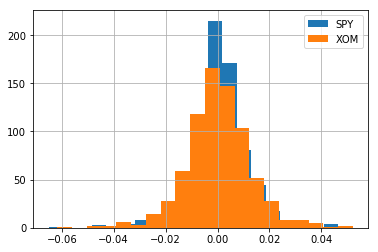

In [7]:
mean=daily_returns['SPY'].mean()
print 'mean=',mean
std=daily_returns['SPY'].std()
print 'std=',std
print 'kurtosis:\n',daily_returns.kurtosis() #fat tails

daily_returns['SPY'].hist(bins=20,label='SPY')
daily_returns['XOM'].hist(bins=20,label='XOM')

plt.legend(loc='upper right')
plt.show()

### Scatterplots
fit a line to it.
**slope-beta**-reveals how reactive the stock is to market. 
If slope =1: 
When the market goes up 1 percent, that stock also goes up 1 percent on average.
**intercepts-alpha**
If intercept>0:
The stock is on average performing better than S&P 500 everyday.

### Slope Does Not Equal Correlation  
Correlation measures how tightly each individual point fit the line.  
You can have a low slope, but as the data is tightly fit the line, that's a high correlation.  

### Scatterplots in python

In [8]:
dates=pd.date_range('2009-01-01','2012-12-31')
symbols=['SPY','XOM','GLD']
df=get_data(symbols,dates)

daily_returns=compute_daily_returns(df)

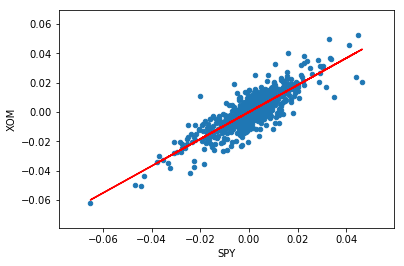

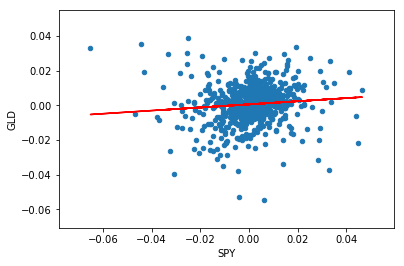

In [11]:
#scatterplot SPY vs. XOM
import numpy as np
daily_returns.plot(kind='scatter',x='SPY',y='XOM')
beta_XOM,alpha_XOM=np.polyfit(daily_returns['SPY'],daily_returns['XOM'],1)#return coef and intercept
plt.plot(daily_returns['SPY'],beta_XOM*daily_returns['SPY']+alpha_XOM,'-',color='r')
plt.show()



daily_returns.plot(kind='scatter',x='SPY',y='GLD')
beta_GLD,alpha_GLD=np.polyfit(daily_returns['SPY'],daily_returns['GLD'],1)
plt.plot(daily_returns['SPY'],beta_GLD*daily_returns['SPY']+alpha_GLD,'-',color='r')
plt.show()

In [31]:
#beta=how stock moves with respect to SPY
#XOM is more reactive to market
print 'beta_XOM=',beta_XOM
print 'beta_GLD=',beta_GLD
#alpha=how well it perform with respect to SPY
#GLD perform better
print 'alpha_XOM=',alpha_XOM
print 'alpha_GLD=',alpha_GLD

beta_XOM= 0.919494841376
beta_GLD= 0.0900022917822
alpha_XOM= -3.86720988847e-05
alpha_GLD= 0.000536345994145


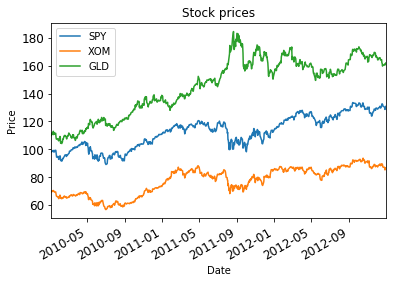

In [32]:
#We can see the upward movement of GLD compared with SPY
plot_data(df, title="Stock prices")

In [33]:
#calculate correlation coefficient
print daily_returns.corr(method='pearson')

          SPY       XOM       GLD
SPY  1.000000  0.842809  0.094312
XOM  0.842809  1.000000  0.116690
GLD  0.094312  0.116690  1.000000


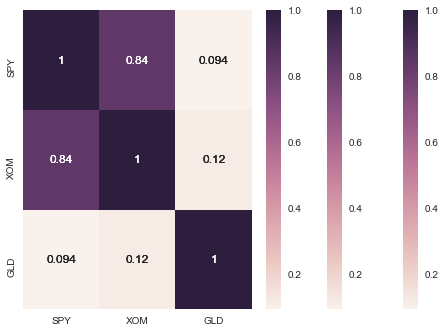

In [36]:
import seaborn as sns
sns.heatmap(daily_returns.corr(method='pearson'),annot=True)
plt.show()

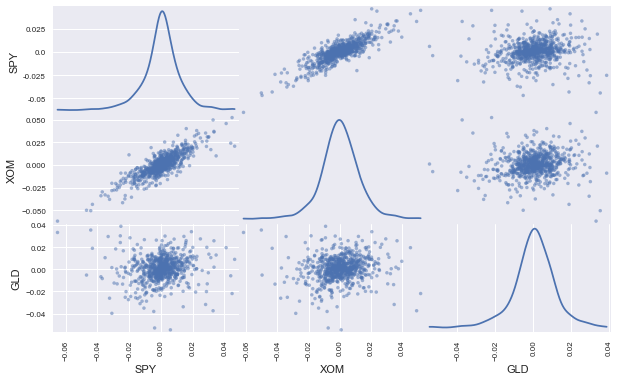

In [40]:
pd.plotting.scatter_matrix(daily_returns, alpha = 0.5, figsize = (10,6), diagonal = 'kde')
plt.show()

### Real World Use Of Kurtosis
The distributions for daily/monthly/annually returns for stocks and the market look very similar to a Gaussian.    
However, we cannot ignore the Kurtosis, the probability in the tails.


In [42]:
daily_returns['SPY'].kurtosis()

3.4343990729764839